In [1]:
import os
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
%matplotlib inline

from sklearn import *

import pickle
import seaborn as sns


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2


In [2]:
dataset = pd.read_csv("IMDB Dataset.csv")
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
dataset['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [6]:
dataset['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

/Users/tom/.conda/envs/workspace/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

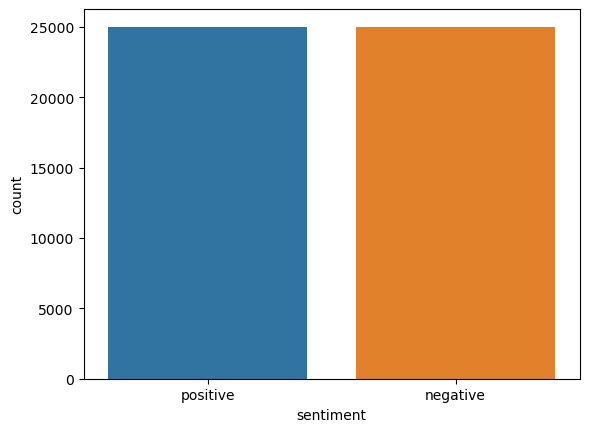

In [7]:
sns.countplot(dataset['sentiment'])

In [8]:
review = dataset['review'].loc[1]
review

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [9]:
soup = BeautifulSoup(review,"html.parser")
review = soup.get_text()
review

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [10]:
review = re.sub('\[[^]]*\]',' ',review)
review = re.sub('[^a-zA-Z]',' ',review)
review

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

In [11]:
review = review.lower()
review

'a wonderful little production  the filming technique is very unassuming  very old time bbc fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  the actors are extremely well chosen  michael sheen not only  has got all the polari  but he has all the voices down pat too  you can truly see the seamless editing guided by the references to williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  a masterful production about one of the great master s of comedy and his life  the realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  it plays on our knowledge and our senses  particularly with the scenes concerning orton and halliwell and the sets  particularly of their flat with halliwell s murals decorating every surface  are terribly well done '

In [12]:
review = review.split()
review

['a',
 'wonderful',
 'little',
 'production',
 'the',
 'filming',
 'technique',
 'is',
 'very',
 'unassuming',
 'very',
 'old',
 'time',
 'bbc',
 'fashion',
 'and',
 'gives',
 'a',
 'comforting',
 'and',
 'sometimes',
 'discomforting',
 'sense',
 'of',
 'realism',
 'to',
 'the',
 'entire',
 'piece',
 'the',
 'actors',
 'are',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'not',
 'only',
 'has',
 'got',
 'all',
 'the',
 'polari',
 'but',
 'he',
 'has',
 'all',
 'the',
 'voices',
 'down',
 'pat',
 'too',
 'you',
 'can',
 'truly',
 'see',
 'the',
 'seamless',
 'editing',
 'guided',
 'by',
 'the',
 'references',
 'to',
 'williams',
 'diary',
 'entries',
 'not',
 'only',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watching',
 'but',
 'it',
 'is',
 'a',
 'terrificly',
 'written',
 'and',
 'performed',
 'piece',
 'a',
 'masterful',
 'production',
 'about',
 'one',
 'of',
 'the',
 'great',
 'master',
 's',
 'of',
 'comedy',
 'and',
 'his',
 'life',
 'the',
 'realism',
 'really',
 'co

In [13]:
nltk.download('stopwords')
review = [word for word in review if not word in set(stopwords.words('english'))]
review

[nltk_data] Downloading package stopwords to /Users/tom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'gives',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actors',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voices',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'references',
 'williams',
 'diary',
 'entries',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'comes',
 'home',
 'little',
 'things',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'techniques',
 'remains',
 'solid',
 'disappears',
 'plays',
 'knowledge',
 'senses',
 'particularly',
 'scenes',
 'concerning',
 'orton',
 'halliwell',
 'sets',
 'particularly',
 'flat',
 'halliwell',
 'murals',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

In [14]:
nltk.download('wordnet')
nltk.download('omw-1.4')
lem = WordNetLemmatizer()
review = [lem.lemmatize(word) for word in review]
review

[nltk_data] Downloading package wordnet to /Users/tom/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/tom/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'give',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actor',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voice',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'reference',
 'williams',
 'diary',
 'entry',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'come',
 'home',
 'little',
 'thing',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'technique',
 'remains',
 'solid',
 'disappears',
 'play',
 'knowledge',
 'sens',
 'particularly',
 'scene',
 'concerning',
 'orton',
 'halliwell',
 'set',
 'particularly',
 'flat',
 'halliwell',
 'mural',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

In [15]:
review = ' '.join(review)
review

'wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done'

In [16]:
corpus = []
corpus.append(review)

In [17]:
countVec = CountVectorizer()
reviewCountVec = countVec.fit_transform(corpus)
reviewCountVec.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
        1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1]])

In [18]:
countVecBinary = CountVectorizer(binary=True)
reviewCountVecBinary = countVecBinary.fit_transform(corpus)
reviewCountVecBinary.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [19]:
tfidVec = TfidfVectorizer()
reviewTfidVec = tfidVec.fit_transform(corpus)
reviewTfidVec.toarray()

array([[0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.09712859, 0.19425717, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.19425717,
        0.09712859, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.19425717, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.19425717, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.29138576, 0.09

In [20]:
dataset_train, dataset_test, train_label, test_label = train_test_split(dataset['review'],dataset['sentiment'],test_size=0.25,random_state=42)

In [21]:
train_label = (train_label.replace({'positive':1,'negative':0})).values
test_label = (test_label.replace({'positive':1,'negative':0})).values

In [22]:

if os.path.isfile('corpusTrain.csv') :
    print ('File Found')

    corpusTrain = pd.read_csv('corpusTrain.csv')
    corpusTest = pd.read_csv('corpusTest.csv')
    corpusTrain = corpusTrain["0"].tolist()
    corpusTest = corpusTest["0"].tolist()

else:
    print ('Not Found')
    corpusTrain = []
    corpusTest = []

    for i in range(dataset_train.shape[0]):
        soup = BeautifulSoup(dataset_train.iloc[i],"html.parser")
        review = soup.get_text()
        review = re.sub('\[[^]]*\]',' ',review)
        review = re.sub('[^a-zA-Z]',' ',review)
        review = review.lower()
        review = review.split()
        review = [word for word in review if not word in set(stopwords.words('english'))]
        lem = WordNetLemmatizer()
        review = [lem.lemmatize(word) for word in review]
        review = ' '.join(review)
        corpusTrain.append(review)
        print(i)

    for j in range(dataset_test.shape[0]):
        soup = BeautifulSoup(dataset_test.iloc[j],"html.parser")
        review = soup.get_text()
        review = re.sub('\[[^]]*\]',' ',review)
        review = re.sub('[^a-zA-Z]',' ',review)
        review = review.lower()
        review = review.split()
        review = [word for word in review if not word in set(stopwords.words('english'))]
        lem = WordNetLemmatizer()
        review = [lem.lemmatize(word) for word in review]
        review = ' '.join(review)
        corpusTest.append(review)
        print(j)

    tmpTest = pd.DataFrame(corpusTest)
    tmpTest.to_csv("corpusTest.csv")

    tmpTrain = pd.DataFrame(corpusTrain)
    tmpTrain.to_csv("corpusTrain.csv")


File Found


In [23]:
corpusTrain[-1]

'decent movie although little bit short time pack lot action grit commonsense emotion time frame matt dillon main character great job movie emotion intensity convincing tense throughout movie typical fancy expensive hollywood cgi action movie satisfying movie indeed price evening great movie movie straight traditional action movie great acting story directing would recommend movie character development character good make believe actually seeing real event taking place movie believe made cheaper budget acting quality much higher'

In [24]:
corpusTest[-1]

'wonderfully funny awe inspiring feature pioneer turntablism dj shadow q bert amazing terrific documentary check every major dj crediting getting scratch thanks herbie hancock post bop classic rockit archival footage complex mind blowing turntable routine time'

In [25]:
tfidVec = TfidfVectorizer(ngram_range=(1, 3))
tfidVec_train = tfidVec.fit_transform(corpusTrain)
tfidVec_test = tfidVec.transform(corpusTest)

In [26]:
#Suppoer Vector Model

linear_svc = LinearSVC(C=0.5, random_state=42)
linear_svc.fit(tfidVec_train, train_label)

predict = linear_svc.predict(tfidVec_test)

In [27]:
print("Classification Report: \n", classification_report(test_label,predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_label,predict))
print("Accuracy: \n", accuracy_score(test_label,predict))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      6157
    Positive       0.89      0.92      0.91      6343

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500

Confusion Matrix: 
 [[5467  690]
 [ 524 5819]]
Accuracy: 
 0.90288


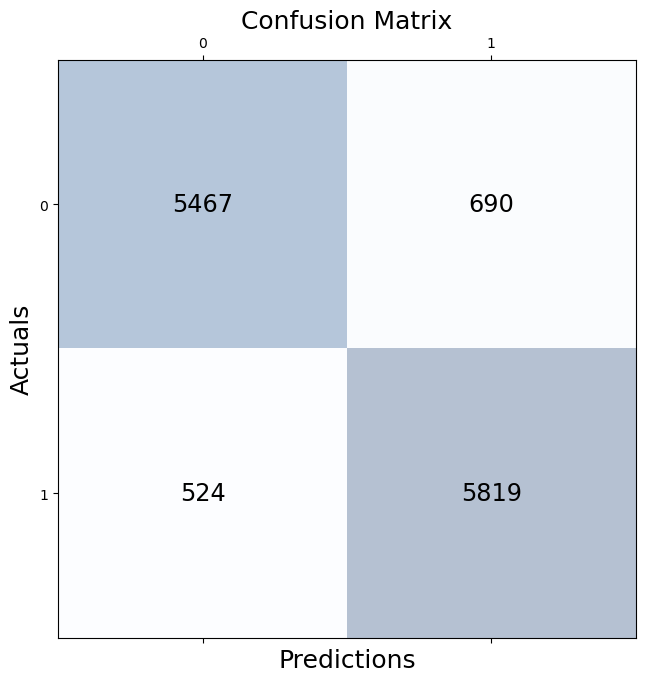

In [28]:
conf_matrix = metrics.confusion_matrix(y_true=test_label, y_pred=predict)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

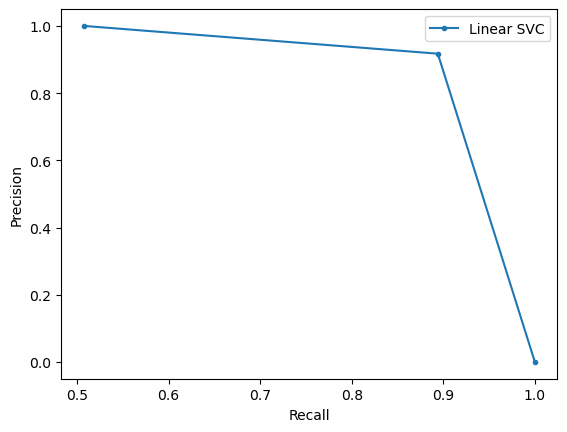

In [29]:
from sklearn.metrics import precision_recall_curve

#precision recall curve
precision, recall, thresholds = precision_recall_curve(test_label, predict)
plt.plot(precision, recall, marker='.', label='Linear SVC')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

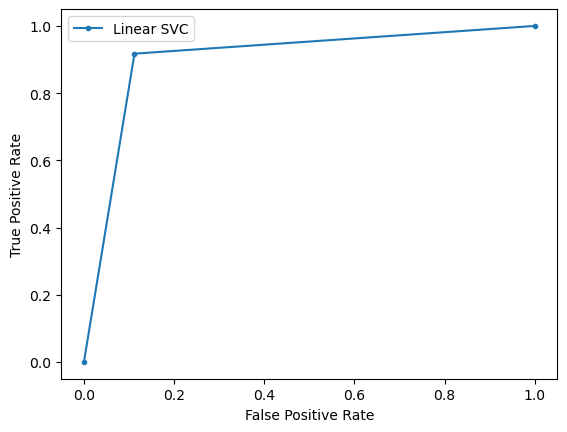

In [30]:
from sklearn.metrics import roc_curve

#ROC curve
fpr, tpr, thresholds = roc_curve(test_label, predict)
plt.plot(fpr, tpr, marker='.', label='Linear SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [31]:
#Naive Bayes

In [32]:
from sklearn.naive_bayes import  MultinomialNB

multiNB = MultinomialNB()
multiNB_train = tfidVec.fit_transform(corpusTrain)
multiNB_test = tfidVec.transform(corpusTest)

multiNB.fit(multiNB_train, train_label)

predict_NB = multiNB.predict(multiNB_test)

In [33]:
print("Classification Report: \n",classification_report(test_label, predict_NB,target_names=['Negative','Positive']))
print("Confusion Matrix: \n",confusion_matrix(test_label,predict_NB))
print("Accuracy: \n",accuracy_score(test_label,predict_NB))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.88      0.90      0.89      6157
    Positive       0.90      0.88      0.89      6343

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500

Confusion Matrix: 
 [[5537  620]
 [ 756 5587]]
Accuracy: 
 0.88992


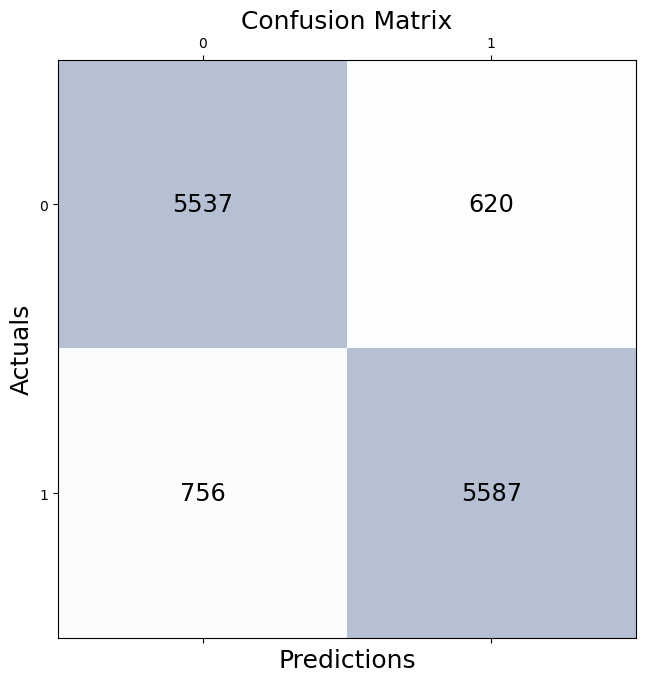

In [34]:
conf_matrix = metrics.confusion_matrix(y_true=test_label, y_pred=predict_NB)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

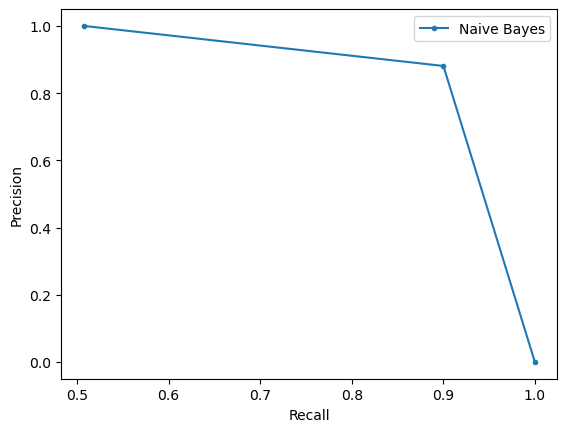

In [35]:
from sklearn.metrics import precision_recall_curve

#precision recall curve
precision, recall, thresholds = precision_recall_curve(test_label, predict_NB)
plt.plot(precision, recall, marker='.', label='Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


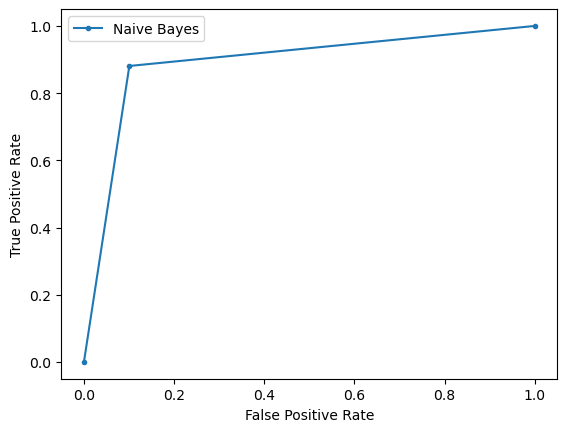

In [36]:
from sklearn.metrics import roc_curve

#ROC curve
fpr, tpr, thresholds = roc_curve(test_label, predict_NB)
plt.plot(fpr, tpr, marker='.', label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [37]:
dataset_predict =  dataset_test.copy()
dataset_predict = pd.DataFrame(dataset_predict)
dataset_predict.columns = ['review']
dataset_predict = dataset_predict.reset_index()
dataset_predict = dataset_predict.drop(['index'],axis=1)
dataset_predict.head()

,review
0,I really liked this Summerslam due to the look...
1,Not many television shows appeal to quite as m...
2,The film quickly gets to a major chase scene w...
3,Jane Austen would definitely approve of this o...
4,Expectations were somewhat high for me when I ...


In [38]:
test_actual_label = test_label.copy()
test_actual_label = pd.DataFrame(test_actual_label)
test_actual_label.columns = ['sentiment']
test_actual_label['sentiment'] = test_actual_label['sentiment'].replace({1: 'positive', 0: 'negative'})

In [39]:
test_predicted_label = predict.copy()
test_predicted_label = pd.DataFrame(test_predicted_label)
test_predicted_label.columns = ['predicted_sentiment']
test_predicted_label['predicted_sentiment'] = test_predicted_label['predicted_sentiment'].replace({1: 'positive', 0: 'negative'})

In [40]:
test_result = pd.concat([dataset_predict,test_actual_label,test_predicted_label],axis=1)
test_result.head()

,review,sentiment,predicted_sentiment
0,I really liked this Summerslam due to the look...,positive,negative
1,Not many television shows appeal to quite as m...,positive,positive
2,The film quickly gets to a major chase scene w...,negative,negative
3,Jane Austen would definitely approve of this o...,positive,positive
4,Expectations were somewhat high for me when I ...,negative,negative


In [41]:
save_classifier = open("tfidVec.pickle","wb")
save_model = open("linearSVC.pickle","wb")
pickle.dump(tfidVec,save_classifier)
pickle.dump(linear_svc,save_model)  # 1: pos , 0:Neg
save_classifier.close()
save_model.close()

In [42]:
# Hint
save_classifier = open("tfidVec.pickle","rb")
save_model = open("linearSVC.pickle","rb")
save_cv = pickle.load(save_classifier)
model = pickle.load(save_model)
save_classifier.close()
save_model.close()

In [43]:
# An example of how to define a function
def test_model(sentence):
    sen = save_cv.transform([sentence]).toarray()
    res = model.predict(sen)[0]
    if res == 1:
        return 'Positive review'
    else:
        return 'Negative review'

In [44]:
# Sample of example test
sen = 'Started good, by the time it ended, it was rubbish'
res = test_model(sen)
print(res)

Negative review


In [45]:
sen = "Kinda Good"
res = test_model(sen)
print(res)

Positive review


In [46]:
nb_save_classifier = open("tfidVecNB.pickle","wb")
nb_model = open("naivebayes.pickle","wb")
pickle.dump(tfidVec,nb_save_classifier)
pickle.dump(multiNB,nb_model)  # 1: pos , 0:Neg
nb_save_classifier.close()
nb_model.close()

In [47]:
nb_save_classifier = open("tfidVecNB.pickle","rb")
nb_model = open("naivebayes.pickle","rb")
save_nb = pickle.load(nb_save_classifier)
model_nb = pickle.load(nb_model)
nb_save_classifier.close()
nb_model.close()

In [48]:
# An example of how to define a function
def test_model(sentence):
    sen = save_nb.transform([sentence]).toarray()
    res = model_nb.predict(sen)[0]
    if res == 1:
        return 'Positive review'
    else:
        return 'Negative review'

In [49]:
# Sample of example test
sen = 'Waste of time'
res = test_model(sen)
print(res)

Negative review


In [50]:
from statsmodels.stats.contingency_tables import mcnemar

#mcnemar test for linear svc model and multinomial naive bayes model
mcnemar_test = mcnemar([[11286,1214], [11124,1376]], exact=False, correction=True)
print('statistic=%.3f, p-value=%.3f' % (mcnemar_test.statistic, mcnemar_test.pvalue))

statistic=7958.201, p-value=0.000


In [51]:
data = [[11286,1214], [11124,1376]]

# calculate mcnemar test
print(mcnemar(data, exact=True))
print(" ")
print(mcnemar(data, exact=False, correction=False))

pvalue      0.0
statistic   1214.0
 
pvalue      0.0
statistic   7959.80710001621
